https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/

Libro que está muy bien de MachineLearning

# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.io

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import GridSearchCV
#from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

%matplotlib inline

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file.

In [5]:
mat = scipy.io.loadmat('./data/ejer_1_data1.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [6]:
mat['X'][:5]


array([[1.9643, 4.5957],
       [2.2753, 3.8589],
       [2.9781, 4.5651],
       [2.932 , 3.5519],
       [3.5772, 2.856 ]])

In [7]:
mat['y'][:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

#### 3. Create a DataFrame with the features and target

In [8]:
df = pd.DataFrame(np.hstack((mat['X'],mat['y'])))
df.columns = ['feature_01','feature_02','target']
df.head(10)

,feature_01,feature_02,target
0,1.9643,4.5957,1.0
1,2.2753,3.8589,1.0
2,2.9781,4.5651,1.0
3,2.9320,3.5519,1.0
4,3.5772,2.8560,1.0
5,4.0150,3.1937,1.0
6,3.3814,3.4291,1.0
7,3.9113,4.1761,1.0
8,2.7822,4.0431,1.0
9,2.5518,4.6162,1.0


#### 4. Plot a scatterplot with the data

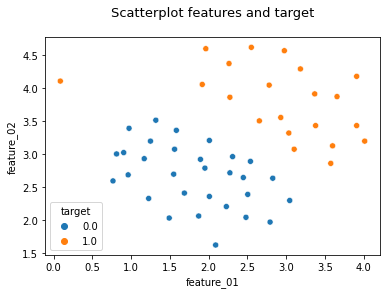

In [9]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1], hue=df.loc[:,'target'])
plt.title('Scatterplot features and target\n', fontsize=13);

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [10]:
X = df.drop('target',axis=1)
y = df['target']

In [11]:
svm_clf1 = LinearSVC(C=1, loss='hinge', max_iter=10000)
standar = StandardScaler()
standar.fit(X)
X_std = standar.transform(X)
svm_clf1.fit(X_std,y)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=10000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [12]:
print('Accuracy ',round(accuracy_score(y, svm_clf1.predict(X_std),4)*100),
'%')

Accuracy  98.0 %


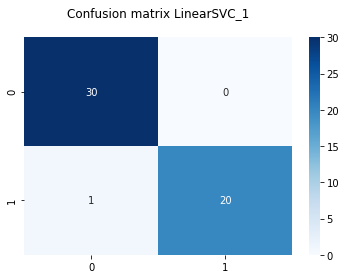

In [13]:
confusion_matrix(y, y_pred=svm_clf1.predict(X_std))
sns.heatmap(confusion_matrix(y, y_pred=svm_clf1.predict(X_std)), annot=True, cmap='Blues')
plt.title('Confusion matrix LinearSVC_1\n');

In [14]:
#Binary classification
print('F1_score ',round(f1_score(y, svm_clf1.predict(X_std)),4)*100,'%')

F1_score  97.56 %


In [15]:
#Get index_row with FalseNegative
df_score = pd.DataFrame({'y_true': y,'y_pred':svm_clf1.predict(X_std)})
idx_error = [i for i,x in enumerate(df_score.y_true!=df_score.y_pred) if x == True]
idx_error

[50]

In [16]:
df_score.iloc[50,:]

y_true    1.0
y_pred    0.0
Name: 50, dtype: float64

In [17]:
X_std[50,:]

array([-2.37373789,  1.3032215 ])

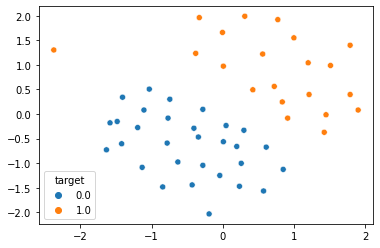

In [18]:
sns.scatterplot(x=X_std[:,0],y=X_std[:,1], hue=df.loc[:,'target']);

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [29]:
svm_clf2 = LinearSVC(C=500, loss='hinge', max_iter=10000)
svm_clf2.fit(X_std, y)

LinearSVC(C=500, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=10000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [30]:
print('Accuracy ',round(accuracy_score(y, svm_clf2.predict(X_std),4)*100),
'%')

Accuracy  100.0 %


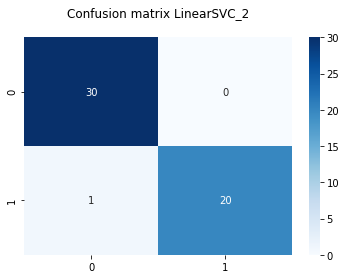

In [31]:
confusion_matrix(y, y_pred=svm_clf2.predict(X_std))
sns.heatmap(confusion_matrix(y, y_pred=svm_clf1.predict(X_std)), annot=True, cmap='Blues')
plt.title('Confusion matrix LinearSVC_2\n');

In [32]:
#Binary classification
print('F1_score ',round(f1_score(y, svm_clf2.predict(X_std)),4)*100,'%')

F1_score  100.0 %


This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

In [33]:
(svm_clf1.predict(X_std) == y).all()

False

In [24]:
(svm_clf1.predict(X_std) != y)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50     True
Name: target, dtype: bool

In [25]:
#La decision_function
dec_func = svm_clf1.decision_function(X_std)
dec_func

array([ 2.62302542,  1.24559356,  4.01305022,  1.43384943,  0.64107918,
        2.11154877,  1.77914009,  4.39776771,  2.43532783,  3.52335877,
        2.95515511,  0.490922  ,  1.21156664,  2.4978833 ,  0.90732525,
        3.62776963,  3.27030993,  2.54535048,  1.33421323,  1.00004773,
       -0.99722519, -0.76185875, -1.88567344, -1.59676338, -0.93744437,
       -0.99999985, -1.52101563, -2.97173569, -2.07550529, -3.80404637,
       -2.86796044, -4.07684999, -1.63889776, -1.74133993, -2.69682403,
       -3.20756198, -4.42967978, -3.57186333, -2.66307625, -3.00187168,
       -1.80424182, -1.88651072, -1.        , -2.93234001, -1.52431246,
       -2.69970207, -4.57864321, -0.78209915, -2.81747077, -4.08344358,
       -1.31040423])

<AxesSubplot:>

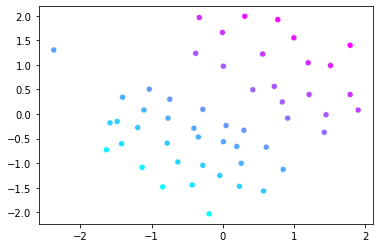

In [26]:
sns.scatterplot(x=X_std[:,0],y=X_std[:,1], c=dec_func, cmap='cool')


Text(0.5, 1.0, 'Scatterplot distance hyperplane with C=1')

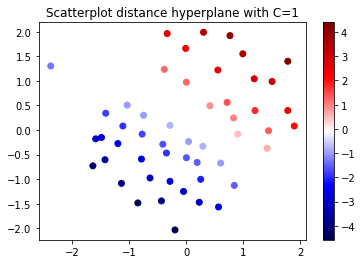

In [27]:
plt.scatter(x=X_std[:,0],y=X_std[:,1], c=dec_func)
plt.set_cmap('seismic')
plt.colorbar()
plt.title('Scatterplot distance hyperplane with C=1')

#### 9. Do the same with the second model

In [35]:
#La decision_function
dec_func2 = svm_clf2.decision_function(X_std)
dec_func2

array([ 16.22758547,   8.03562326,  20.57512942,   7.09112201,
         1.0000221 ,   7.47277368,   7.58784781,  19.85184095,
        12.82189466,  19.24766697,  13.83232591,   1.60164411,
         8.91012433,  14.68259345,   5.12693341,  17.92829957,
        14.6460829 ,  10.06970023,   4.59238755,   4.49419546,
        -1.76764869,  -1.78291622,  -7.54745367,  -6.97413537,
        -3.59458268,  -5.45528147,  -8.85313824, -14.8472736 ,
       -10.18240838, -17.4399517 , -12.9046995 , -16.97587437,
        -6.07425461,  -5.62893483, -10.64065256, -13.74600176,
       -19.62137979, -13.52716266,  -9.34005761, -10.07496094,
        -4.22675539,  -5.47744704,  -1.        , -13.89088231,
        -7.1019556 , -14.3291265 , -22.17660988,  -3.45440404,
        -9.37336895, -15.65052161,   0.99985158])

Text(0.5, 1.0, 'Scatterplot distance hyperplane with C=15')

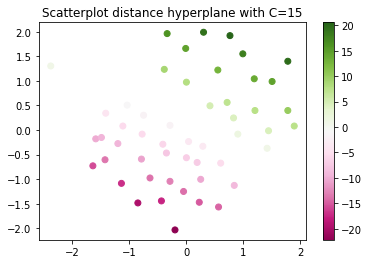

In [38]:
plt.scatter(x=X_std[:,0],y=X_std[:,1], alpha= 1.8, c=dec_func2)
plt.set_cmap('PiYG')
plt.colorbar()
plt.title('Scatterplot distance hyperplane with C=15')

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [291]:
mat = scipy.io.loadmat('./data/ejer_1_data2.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [292]:
mat['X'][:10]

array([[0.107143 , 0.60307  ],
       [0.093318 , 0.649854 ],
       [0.0979263, 0.705409 ],
       [0.15553  , 0.784357 ],
       [0.210829 , 0.866228 ],
       [0.328341 , 0.929094 ],
       [0.429724 , 0.934942 ],
       [0.620968 , 0.934942 ],
       [0.756912 , 0.910088 ],
       [0.819124 , 0.879386 ]])

In [293]:
mat['X'].shape

(863, 2)

In [294]:
mat['y'][-10:]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

In [295]:
mat['y'].shape

(863, 1)

#### 2. Create a DataFrame with the features and target

In [296]:
df = pd.DataFrame(np.hstack((mat['X'],mat['y'])))
df.columns = ['feature_01','feature_02','target']
df.head(10)

,feature_01,feature_02,target
0,0.107143,0.603070,1.0
1,0.093318,0.649854,1.0
2,0.097926,0.705409,1.0
3,0.155530,0.784357,1.0
4,0.210829,0.866228,1.0
5,0.328341,0.929094,1.0
6,0.429724,0.934942,1.0
7,0.620968,0.934942,1.0
8,0.756912,0.910088,1.0
9,0.819124,0.879386,1.0


In [297]:
df.describe()

,feature_01,feature_02,target
count,863.000000,863.000000,863.000000
mean,0.503414,0.694304,0.556199
std,0.254967,0.158884,0.497120
min,0.044931,0.402632,0.000000
25%,0.292627,0.557018,0.000000
50%,0.512673,0.693713,1.000000
75%,0.699309,0.830409,1.000000
max,0.998848,0.988596,1.000000


#### 3. Plot a scatterplot with the data

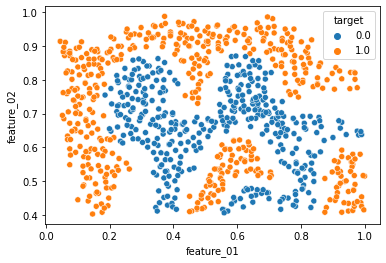

In [298]:
sns.scatterplot(x='feature_01', y='feature_02', data=df, hue='target');

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [299]:
X = df.drop('target', axis=1)
y = df.loc[:,'target']

In [300]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

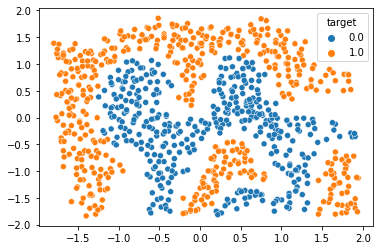

In [301]:
sns.scatterplot(x=X_std[:,0], y=X_std[:,1], hue=y);

In [42]:
from sklearn.svm import SVC 

svm_rbf_100_clf = SVC(C=100, kernel='rbf', gamma=10, probability=True)

#### 5. Fit the classifier and get the score

In [43]:
svm_rbf_100_clf.fit(X_std, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [44]:
print('Accuracy ',round(accuracy_score(y, svm_rbf_100_clf.predict(X_std),4)*100),
'%')

Accuracy  100.0 %


In [45]:
confusion_matrix(y, y_pred=svm_rbf_100_clf.predict(X_std))

array([[30,  0],
       [ 0, 21]], dtype=int64)

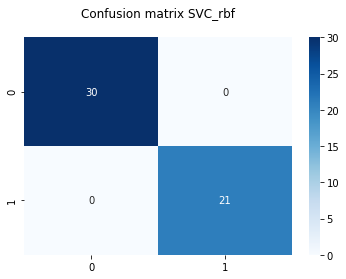

In [46]:
sns.heatmap(confusion_matrix(y, y_pred=svm_rbf_100_clf.predict(X_std)), annot=True, cmap='Blues')
plt.title('Confusion matrix SVC_rbf\n');

In [47]:
print('F1_score ',round(f1_score(y, svm_rbf_100_clf.predict(X_std)),4)*100,'%')

F1_score  100.0 %


#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [48]:
pred_prob_svm_rbf_100_clf = svm_rbf_100_clf.predict_proba(X_std)
pred_prob_svm_rbf_100_clf

array([[2.26823489e-08, 9.99999977e-01],
       [2.27737710e-08, 9.99999977e-01],
       [2.27862405e-08, 9.99999977e-01],
       [2.28281972e-08, 9.99999977e-01],
       [2.28867232e-08, 9.99999977e-01],
       [2.27298869e-08, 9.99999977e-01],
       [2.27644828e-08, 9.99999977e-01],
       [2.29026903e-08, 9.99999977e-01],
       [2.26958559e-08, 9.99999977e-01],
       [2.26751213e-08, 9.99999977e-01],
       [2.28386859e-08, 9.99999977e-01],
       [2.27272208e-08, 9.99999977e-01],
       [2.29654104e-08, 9.99999977e-01],
       [2.28071447e-08, 9.99999977e-01],
       [2.27336555e-08, 9.99999977e-01],
       [2.27727537e-08, 9.99999977e-01],
       [2.27846097e-08, 9.99999977e-01],
       [2.27772020e-08, 9.99999977e-01],
       [2.28222429e-08, 9.99999977e-01],
       [2.27860619e-08, 9.99999977e-01],
       [9.99479552e-01, 5.20447547e-04],
       [9.99478738e-01, 5.21262474e-04],
       [9.99479142e-01, 5.20857630e-04],
       [9.99479833e-01, 5.20166749e-04],
       [9.994789

In [49]:
pred_prob_svm_rbf_100_clf.shape[0]

51

Text(0.5, 1.0, 'Scatterplot predicting "0"')

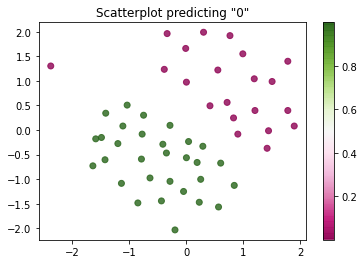

In [50]:
plt.scatter(x=X_std[:,0],y=X_std[:,1], c=pred_prob_svm_rbf_100_clf[:,0], alpha=0.8)
plt.set_cmap('PiYG')
plt.colorbar()
plt.title('Scatterplot predicting "0"')

In [51]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b*")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "go")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

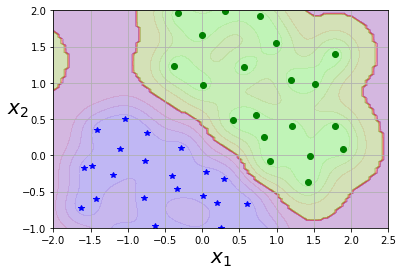

In [52]:
plot_predictions(svm_rbf_100_clf, [-2, 2.5, -1, 2])
plot_dataset(X_std, y, [-2, 2.5, -1, 2])

## Exercise 3

For the third data set we're given both training and validation sets and tasked with finding optimal hyper-parameters for an SVM model based on validation set performance.  Although we could use scikit-learn's built-in grid search to do this quite easily, in the spirit of following the exercise directions we'll implement a simple grid search from scratch.

#### 1. Load the data `ejer_1_data3.mat`

In [53]:
mat = scipy.io.loadmat('./data/ejer_1_data3.mat')
type(mat)

dict

In [54]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

#### 2. Create a DataFrame with the features and target

In [55]:
tot_mat = np.concatenate([mat['X'], mat['y']], axis=1)
df = pd.DataFrame(tot_mat, columns=['feature_01', 'feature_02', 'target'])

In [56]:
df

,feature_01,feature_02,target
0,-0.158986,0.423977,1.0
1,-0.347926,0.470760,1.0
2,-0.504608,0.353801,1.0
3,-0.596774,0.114035,1.0
4,-0.518433,-0.172515,1.0
...,...,...,...
206,-0.399885,-0.621930,1.0
207,-0.124078,-0.126608,1.0
208,-0.316935,-0.228947,1.0
209,-0.294124,-0.134795,0.0


#### 3. Get the validation data from the dataset `Xval` and `yval`

In [57]:
Xval = df.drop('target', axis=1)
yval = df['target']

In [58]:
print('Shape X_features:', Xval.shape)
print('Shape y_labels:', yval.shape)

Shape X_features: (211, 2)
Shape y_labels: (211,)


In [59]:
Xval_std = standar.fit_transform(Xval)

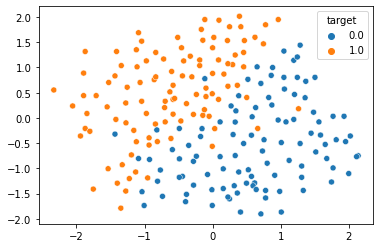

In [60]:
sns.scatterplot(x=Xval_std[:,0], y=Xval_std[:,1], hue=yval);

#### 4. Try different hyperparameters
You are going to find the best hyperparameters that best fit your model.
1. Try C from 0.01 to 100
2. Try gamma from 0.01 to 100

Train the model and then get the score with the validation data. Which combination of hyperparameters trains the best model in validation score?

In [61]:
from sklearn.model_selection import GridSearchCV

#LINEAR
svm_rgl_c_g = SVC(kernel='linear')
print()
parameters = {'C':np.arange(0.01,100,10),
              'gamma':np.arange(0.01,100,10)}

grid_svm = GridSearchCV(svm_rgl_c_g,
                        parameters,
                        scoring = 'accuracy',
                        cv = 5)
grid_svm.fit(Xval_std, yval)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.000e-02, 1.001e+01, 2.001e+01, 3.001e+01, 4.001e+01, 5.001e+01,
       6.001e+01, 7.001e+01, 8.001e+01, 9.001e+01]),
                         'gamma': array([1.000e-02, 1.001e+01, 2.001e+01, 3.001e+01, 4.001e+01, 5.001e+01,
       6.001e+01, 7.001e+01, 8.001e+01, 9.001e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [62]:
grid_svm.best_params_

{'C': 10.01, 'gamma': 0.01}

In [63]:
svm_rgl_c_g = SVC(kernel='linear', C=10.01, gamma=0.01)
svm_rgl_c_g.fit(Xval_std, yval)

SVC(C=10.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
ac_rgl = accuracy_score(yval,  svm_rgl_c_g.predict(Xval_std))
print('Accuracy',round(ac_rgl*100,2),'%')


Accuracy 92.42 %


In [326]:
#POLYNOMIAL
svm_poly_c_g = SVC(kernel='poly', degree=1.5)
print()
parameters = {'C':np.arange(0.01,100,10),
              'gamma':np.arange(0.01,100,10)}

grid_svm = GridSearchCV(svm_poly_c_g,
                        parameters,
                        scoring = 'accuracy',
                        cv = 3)
grid_svm.fit(Xval_std, yval)


C:\Users\pilar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=1.5,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.000e-02, 1.001e+01, 2.001e+01, 3.001e+01, 4.001e+01, 5.001e+01,
       6.001e+01, 7.001e+01, 8.001e+01, 9.001e+01]),
                         'gamma': array([1.000e-02, 1.001e+01, 2.001e+01, 3.001e+01, 4.001e+01, 5.001e+01,
       6.001e+01, 7.001e+01, 8.001e+01, 9.001e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [226]:
grid_svm.best_params_

{'C': 10.01, 'gamma': 10.01}

In [227]:
svm_poly_c_g = SVC(kernel='poly', degree=1.5, C=10.01, gamma=10.01)
svm_poly_c_g.fit(Xval_std,yval)

SVC(C=10.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1.5, gamma=10.01, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [228]:
ac_poly = accuracy_score(yval,  svm_poly_c_g.predict(Xval_std))
print('Accuracy',round(ac_poly*100,2),'%')

Accuracy 92.89 %


In [221]:
#Rbf
svm_rbf_c_g = SVC(kernel='rbf')
print()
parameters = {'C':np.arange(0.01,100,10),
              'gamma':np.arange(0.01,100,10)}

grid_svm = GridSearchCV(svm_rbf_c_g,
                        parameters,
                        scoring = 'accuracy',
                        cv = 3)
grid_svm.fit(Xval_std, yval)


C:\Users\pilar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.000e-02, 1.001e+01, 2.001e+01, 3.001e+01, 4.001e+01, 5.001e+01,
       6.001e+01, 7.001e+01, 8.001e+01, 9.001e+01]),
                         'gamma': array([1.000e-02, 1.001e+01, 2.001e+01, 3.001e+01, 4.001e+01, 5.001e+01,
       6.001e+01, 7.001e+01, 8.001e+01, 9.001e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [222]:
grid_svm.best_params_

{'C': 50.01, 'gamma': 0.01}

In [223]:
svm_rbf_c_g = SVC(kernel='rbf', C=50.01, gamma=0.01)
svm_rbf_c_g.fit(Xval_std, yval)

SVC(C=50.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [224]:
ac_rbf = accuracy_score(yval,  svm_rbf_c_g.predict(Xval_std))
print('Accuracy',round(ac_rbf*100,2),'%')

Accuracy 92.89 %


## Exercise 4
Now we'll move on to the second part of the exercise. In this part our objective is to use SVMs to build a spam filter.  In the exercise text, there's a task involving some text pre-processing to get our data in a format suitable for an SVM to handle.  However, the task is pretty trivial (mapping words to an ID from a dictionary that's provided for the exercise) and the rest of the pre-processing steps such as HTML removal, stemming, normalization etc. are already done.  Rather than reproduce these pre-processing steps, I'm going to skip ahead to the machine learning task which involves building a classifier from pre-processed train and test data sets consisting of spam and non-spam emails transformed to word occurance vectors.

#### 1. Load the data `spamTrain.mat` and `spamTest.mat`

In [327]:
mat_train = scipy.io.loadmat('./data/spamTrain.mat')
mat_test = scipy.io.loadmat('./data/spamTest.mat')

In [328]:
mat_train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [335]:
mat_train['X'].shape

(4000, 1899)

In [336]:
mat_train['y'].shape


(4000, 1)

In [345]:
mat_train = np.concatenate([mat_train['X'],mat_train['y']], axis=1)
mat_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [330]:
mat_test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest'])

In [339]:
mat_test['Xtest'].shape

(1000, 1899)

In [343]:
mat_test['ytest'].shape

(1000, 1)

In [346]:
mat_test = np.concatenate([mat_test['Xtest'],mat_test['ytest']], axis=1)
mat_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

#### 2. Create a DataFrame with the features and target, for train and test
Be careful with the test dimensions

In [348]:
df_train = pd.DataFrame(mat_train)
df_train

,0,1,2,3,4,5,6,7,8,9,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,1,1,0,0,0,1,...,0,1,1,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3998,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0


In [349]:
df_test = pd.DataFrame(mat_test)
df_test

,0,1,2,3,4,5,6,7,8,9,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
996,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
997,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


#### 3. Fit a SVC and get the accuracy in train and test

In [350]:
X_train = df_train.iloc[:,:-1]
X_train.shape

(4000, 1899)

In [352]:
y_train = df_train.iloc[:,-1]
y_train.shape

(4000,)

In [354]:
X_test = df_test.iloc[:,:-1]
print(X_test.shape)
y_test = df_test.iloc[:,-1]
y_test.shape

(1000, 1899)


(1000,)

Each document has been converted to a vector with 1,899 dimensions corresponding to the 1,899 words in the vocabulary.  The values are binary, indicating the presence or absence of the word in the document.  At this point, training and evaluation are just a matter of fitting the testing the classifer. 

In [ ]:
#Rbf
svm_rbf_words = SVC(kernel='rbf', C= 1, gamma = 10)

svm_rbf_words.fit(X_train, y_train)
svm_rbf_pred = svm_rbf_words.predict(X_test)